In [25]:
from scipy import ndimage
import matplotlib.pyplot as plt
from filter import *
from segment_graph import *
import time
import cv2

# --------------------------------------------------------------------------------
# Segment an image:
# Returns a color image representing the segmentation.
#
# Inputs:
#           in_image: image to segment.
#           sigma: to smooth the image.
#           k: constant for threshold function.
#           min_size: minimum component size (enforced by post-processing stage).
#
# Returns:
#           num_ccs: number of connected components in the segmentation.
# --------------------------------------------------------------------------------
def segment(in_image, sigma, k, min_size):
    start_time = time.time()
    height, width, band = in_image.shape
    print("Height:  " + str(height))
    print("Width:   " + str(width))
    smooth_red_band = smooth(in_image[:, :, 0], sigma)
    smooth_green_band = smooth(in_image[:, :, 1], sigma)
    smooth_blue_band = smooth(in_image[:, :, 2], sigma)

    # build graph
    edges_size = width * height * 4
    edges = np.zeros(shape=(edges_size, 3), dtype=object)
    num = 0
    for y in range(height):
        for x in range(width):
            if x < width - 1:
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int(y * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y)
                num += 1
            if y < height - 1:
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y + 1) * width + x)
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x, y + 1)
                num += 1

            if (x < width - 1) and (y < height - 2):
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y + 1) * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y + 1)
                num += 1

            if (x < width - 1) and (y > 0):
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y - 1) * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y - 1)
                num += 1
    # Segment
    u = segment_graph(width * height, num, edges, k)

    # post process small components
    for i in range(num):
        a = u.find(edges[i, 0])
        b = u.find(edges[i, 1])
        if (a != b) and ((u.size(a) < min_size) or (u.size(b) < min_size)):
            u.join(a, b)

    num_cc = u.num_sets()
    output = np.zeros(shape=(height, width, 3))

    # pick random colors for each component
    colors = np.zeros(shape=(height * width, 3))
    for i in range(height * width):
        colors[i, :] = random_rgb()

    for y in range(height):
        for x in range(width):
            comp = u.find(y * width + x)
            output[y, x, :] = colors[comp, :]

    elapsed_time = time.time() - start_time
    print(
        "Execution time: " + str(int(elapsed_time / 60)) + " minute(s) and " + str(
            int(elapsed_time % 60)) + " seconds")

    # displaying the result
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(in_image)
    a.set_title('Original Image')
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(output.astype('int'))
    a.set_title('Segmented Image')
    plt.show()

    return in_image, output

Loading is done.
processing...
Height:  720
Width:   480
Execution time: 0 minute(s) and 31 seconds


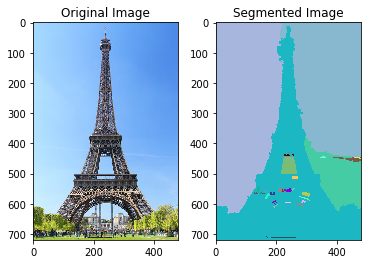

In [26]:
if __name__ == "__main__":
    
    sigma = 0.5
    k = 500
    min = 50
    input_path = "data/paris.jpg"
    input_path = 'data/exp1_num_320649.jpg'

    # Loading the image
    input_image = ndimage.imread(input_path, flatten=False, mode=None)
#     input_image = cv2.imread(input_path)

    print("Loading is done.")
    print("processing...")
    in_im, output = segment(input_image, sigma, k, min)

Loading is done.
processing...
Height:  262
Width:   191
Execution time: 0 minute(s) and 4 seconds


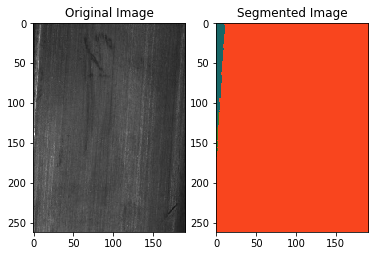

In [30]:
input_path = 'data/exp1_num_320649.jpg'
# Loading the image
input_image = ndimage.imread(input_path, flatten=False, mode=None)
input_image = cv2.imread(input_path)

print("Loading is done.")
print("processing...")
in_im, output = segment(input_image, sigma, k, min)